In [4]:
import requests as r

In [5]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

In [6]:
raw_data = resp.json()

In [7]:
raw_data[0]

{'ID': '5b679794-2952-4c4c-a873-af6ff457b0fd',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [8]:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [9]:
final_data[0]

[1, 0, 0, 1, '2020-02-26T00:00:00Z']

In [10]:
final_data.insert(0, ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'])

In [11]:
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [12]:
for i in range (1, len(final_data)):
    final_data[i][DATA] = final_data[i][DATA][:10]

In [13]:
import csv

In [14]:
with open('brasil_covid.csv', 'w') as file_csv:
    escritor = csv.writer(file_csv)
    escritor.writerows(final_data)

In [15]:
import datetime as dt

In [16]:
for i in range (1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')

In [17]:
print(type(final_data[DATA]))

<class 'list'>


In [18]:
final_data

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)],
 [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)],
 [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)],
 [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)],
 [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)],
 [151, 0, 0, 151, datetime.da

In [19]:
def get_datasets (y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
        return datasets
    else:
        return [{
            'label': labels[0],
            'data': y
        }]

In [20]:
def set_title (title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title': title,
        'display': display
    }

In [21]:
final_data[0]

['confirmados', 'obitos', 'recuperados', 'ativos', 'data']

In [37]:
def create_chart (x, y, labels, kind='bar', title=''):
    datasets = get_datasets(y, labels)
    options = set_title(title='')

    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    return chart

In [38]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [39]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [40]:
from PIL import Image
from IPython.display import display

In [41]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

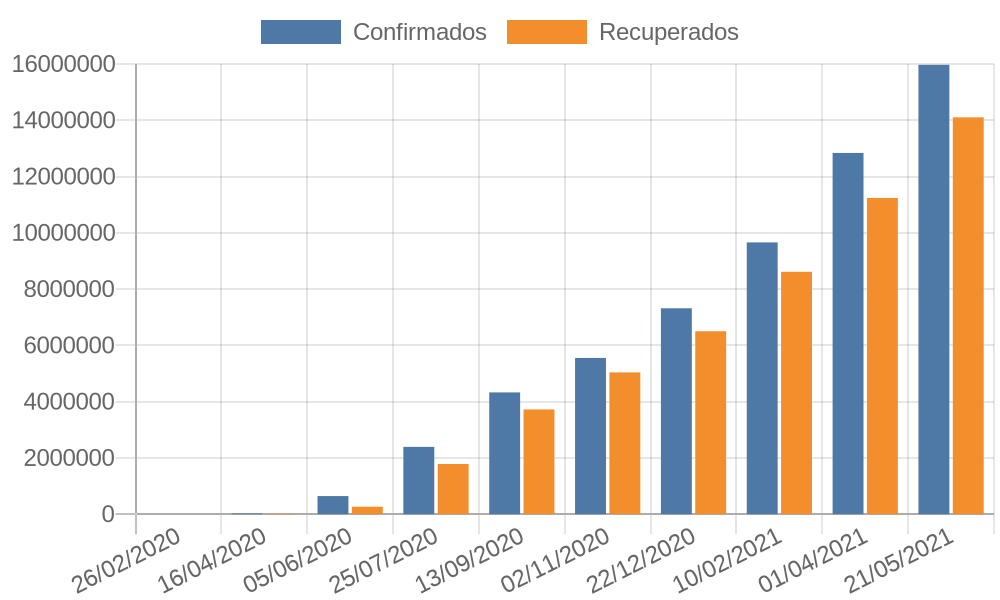

In [43]:
y_data_1 = []
for obs in final_data[1::50]:
    y_data_1.append(obs[CONFIRMADOS])

y_data_2 = []
for obs in final_data[1::50]:
    y_data_2.append(obs[RECUPERADOS])

labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::50]:
    x.append(obs[DATA].strftime('%d/%m/%Y'))

chart = create_chart(x, [y_data_1, y_data_2], labels, title='Gráfico Confirmados vs Recuperados')
chart_content = get_api_chart(chart)
save_image('meu_primeiro_grafico_com_python.png', chart_content)
display_image('meu_primeiro_grafico_com_python.png')

In [44]:
from urllib.parse import quote

In [45]:
def get_api_qrcode(link):
    text = quote(link)
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content

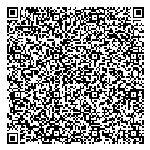

In [46]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr_code.png', get_api_qrcode(link))
display_image('qr_code.png')

In [47]:
raw_data[1]

{'ID': 'a832f928-7fc5-4b87-9f25-240412f6ac82',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-27T00:00:00Z'}

In [48]:
final_data[1]

[1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)]